## Análise de Convergência dos estados brasileiros considerando indicadores utilizados pelo Eurofound

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

# Indicadores relacionados ao Índice de Desenvolvimento Humano

### PNAD Contínua

In [8]:
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [9]:
df_mul_siafi_ibge = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx')

In [10]:
df_mul_siafi_ibge.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [11]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

In [12]:
df_dim_eco_gini = df_mul_siafi_ibge.drop(columns=['IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [13]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI
0,2012,BRASIL,NaN,NaN,0.540
1,2013,BRASIL,NaN,NaN,0.532
2,2014,BRASIL,NaN,NaN,0.526
3,2015,BRASIL,NaN,NaN,0.524
4,2016,BRASIL,NaN,NaN,0.537


In [14]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       490 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.3+ KB


In [15]:
df_dim_eco_gini['ANO'] = pd.to_datetime(df_dim_eco_gini['ANO'], format='%Y')

In [16]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ANO        490 non-null    datetime64[ns]
 1   AGREGACAO  490 non-null    object        
 2   CODIGO     480 non-null    float64       
 3   NOME       480 non-null    object        
 4   GINI       490 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 19.3+ KB


In [17]:
import pandas as pd

# Extrair o ano da coluna "Referência"
df_dim_eco_gini['Ano'] = df_dim_eco_gini['ANO'].dt.year


In [18]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
0,2012-01-01,BRASIL,NaN,NaN,0.540,2012
1,2013-01-01,BRASIL,NaN,NaN,0.532,2013
2,2014-01-01,BRASIL,NaN,NaN,0.526,2014
3,2015-01-01,BRASIL,NaN,NaN,0.524,2015
4,2016-01-01,BRASIL,NaN,NaN,0.537,2016


In [19]:
df_dim_eco_gini_est = df_dim_eco_gini.dropna(how='any')
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
485,2021-01-01,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),0.488,2021
486,2021-01-01,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),0.484,2021
487,2021-01-01,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),0.491,2021
488,2021-01-01,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),0.484,2021
489,2021-01-01,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),0.500,2021


In [20]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_eco_gini_est = df_dim_eco_gini_est[~df_dim_eco_gini_est['AGREGACAO'].str.contains('RM_RIDE')]

In [21]:
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
275,2021-01-01,UF,43.0,Rio Grande do Sul,0.468,2021
276,2021-01-01,UF,50.0,Mato Grosso do Sul,0.496,2021
277,2021-01-01,UF,51.0,Mato Grosso,0.461,2021
278,2021-01-01,UF,52.0,Goiás,0.467,2021
279,2021-01-01,UF,53.0,Distrito Federal,0.566,2021


In [22]:
df_dim_eco_gini_est = df_dim_eco_gini_est.drop(columns=['ANO', 'AGREGACAO', 'CODIGO'])

In [23]:
df_dim_eco_gini_est.tail()

,NOME,GINI,Ano
275,Rio Grande do Sul,0.468,2021
276,Mato Grosso do Sul,0.496,2021
277,Mato Grosso,0.461,2021
278,Goiás,0.467,2021
279,Distrito Federal,0.566,2021


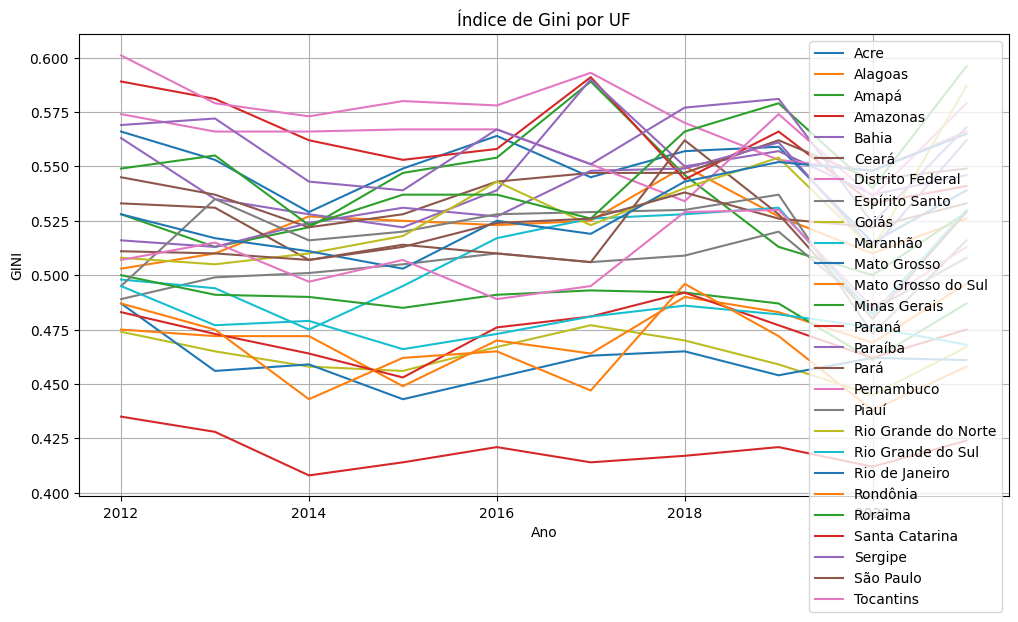

In [24]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_eco_gini_est.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['GINI'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Índice de Gini por UF')
plt.xlabel('Ano')
plt.ylabel('GINI')
plt.legend()
plt.grid(True)

plt.show()

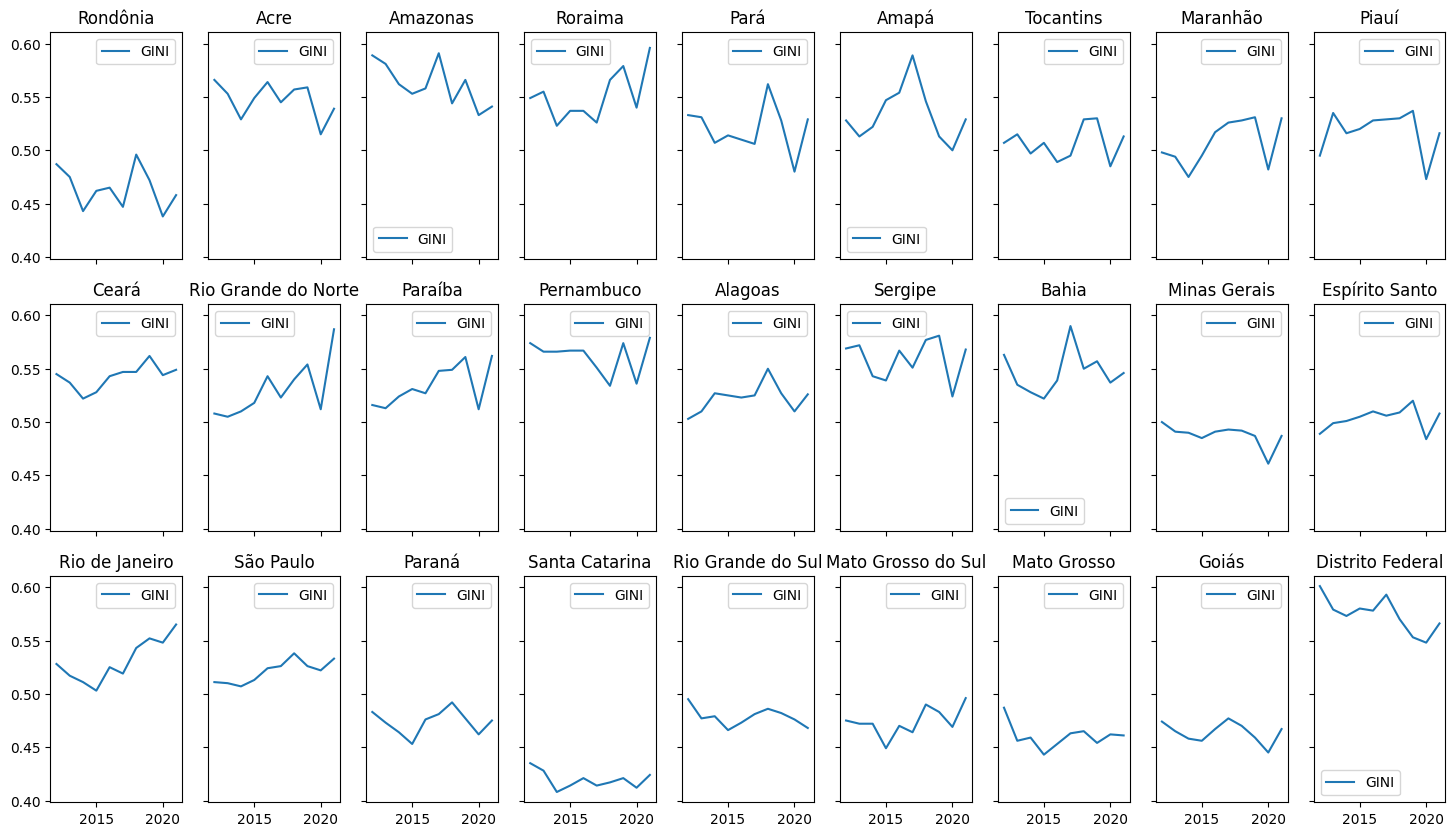

In [25]:
# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_eco_gini_est['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_eco_gini_est[df_dim_eco_gini_est['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='GINI', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [26]:
pivot_df_dim_eco_gini_est = df_dim_eco_gini_est.pivot(index='Ano', columns='NOME', values='GINI')

In [27]:
pivot_df_dim_eco_gini_est.head()

NOME,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,0.498,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,0.494,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,0.475,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,0.495,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,0.517,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [28]:
pivot_df_dim_eco_gini_est.reset_index(inplace=True)
pivot_df_dim_eco_gini_est.rename(columns={'index': 'Ano'}, inplace=True)

In [29]:
pivot_df_dim_eco_gini_est.head()

NOME,Ano,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
1,2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2,2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
3,2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
4,2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [30]:
gini_states_br = pivot_df_dim_eco_gini_est.rename(columns={'Ano': 'time'})

In [31]:
gini_states_br.head()

NOME,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
1,2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2,2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
3,2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
4,2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [32]:
#criando arquivo csv final
gini_states_br.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\gini_states_br.csv', encoding='UTF-8', index = False)

# PIB estadual

### fonte: ipeadata (http://www.ipeadata.gov.br/Default.aspx)

In [33]:
caminho = 'D:\\docs_mariana\\ProjetosGit\\Convergencia\\ipeadata_pib[16-05-2024-11-46].csv'
#skiprows=1 para tirar o título da tabela
ipeadata_pib = pd.read_csv(caminho, delimiter=';', skiprows=1)


In [34]:
ipeadata_pib.head()

,Sigla,Código,Estado,1939,1947,1948,1949,1950,1951,1952,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 64
0,AC,12,Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,"21374440,009",NaN
1,AL,27,Alagoas,"1,5E-10","6,23E-10","6,97E-10","8,01E-10","8,69E-10","1,09E-09","1,19E-09",...,37282529,40974994,46367211,49468741,52851067,54413047,58963729,63202349,"76265620,286",NaN
2,AM,13,Amazonas,"1,84E-10","6,63E-10","6,31E-10","7,01E-10","7,33E-10","9,93E-10","1,14E-09",...,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,"131531037,762",NaN
3,AP,16,Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12763486,13400284,13861293,14342135,15481908,16795207,17496661,18469115,"20099850,517",NaN
4,BA,29,Bahia,"7,59E-10","2,82E-09","3,07E-09","3,33E-09","3,87E-09","4,56E-09","5,12E-09",...,204844274,223929966,245043690,258738970,268724090,286239541,293240504,305320813,"352617851,769",NaN


In [35]:
ipeadata_pib.columns

Index(['Sigla', 'Código', 'Estado', '1939', '1947', '1948', '1949', '1950',
       '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1970', '1975',
       '1980', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'Unnamed: 64'],
      dtype='object')

In [36]:
ipeadata_pib = ipeadata_pib.drop(columns = ['Sigla', 'Código','Unnamed: 64'])

In [37]:
ipeadata_pib.head()

,Estado,1939,1947,1948,1949,1950,1951,1952,1953,1954,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10137925,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,"21374440,009"
1,Alagoas,"1,5E-10","6,23E-10","6,97E-10","8,01E-10","8,69E-10","1,09E-09","1,19E-09","1,35E-09","1,76E-09",...,34650397,37282529,40974994,46367211,49468741,52851067,54413047,58963729,63202349,"76265620,286"
2,Amazonas,"1,84E-10","6,63E-10","6,31E-10","7,01E-10","7,33E-10","9,93E-10","1,14E-09","1,23E-09","1,64E-09",...,72242701,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,"131531037,762"
3,Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11130868,12763486,13400284,13861293,14342135,15481908,16795207,17496661,18469115,"20099850,517"
4,Bahia,"7,59E-10","2,82E-09","3,07E-09","3,33E-09","3,87E-09","4,56E-09","5,12E-09","6,39E-09","9,69E-09",...,182572530,204844274,223929966,245043690,258738970,268724090,286239541,293240504,305320813,"352617851,769"


In [38]:
gni_states_br = ipeadata_pib.melt(id_vars='Estado', var_name='Ano', value_name='pib')

In [39]:
gni_states_br.head()

,Estado,Ano,pib
0,Acre,1939,NaN
1,Alagoas,1939,"1,5E-10"
2,Amazonas,1939,"1,84E-10"
3,Amapá,1939,NaN
4,Bahia,1939,"7,59E-10"


In [40]:
# Reorganizando o DataFrame para ter os estados como colunas e datas como índices
gni_states_br = gni_states_br.pivot(index='Ano', columns='Estado')['pib']

# Removendo o nome da coluna de estados ('Estado')
gni_states_br.columns.name = None

In [41]:
gni_states_br.head()

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
1939,NaN,"1,5E-10",NaN,"1,84E-10","7,59E-10","3,53E-10",NaN,"2,01E-10","1,99E-10","2,07E-10",...,"1,44E-10","1,41E-10","1,72E-09","3,54E-09",NaN,NaN,"3,79E-10","1,04E-10","5,26E-09",NaN
1947,NaN,"6,23E-10",NaN,"6,63E-10","2,82E-09","1,2E-09",NaN,"7,53E-10","6,08E-10","5,15E-10",...,"4,48E-10","5,99E-10","6,44E-09","1,22E-08",NaN,NaN,"1,92E-09","3,71E-10","2,11E-08",NaN
1948,NaN,"6,97E-10",NaN,"6,31E-10","3,07E-09","1,37E-09",NaN,"8,38E-10","7,2E-10","6,28E-10",...,"3,72E-10","6,67E-10","6,9E-09","1,41E-08",NaN,NaN,"2,06E-09","4,2E-10","2,53E-08",NaN
1949,NaN,"8,01E-10",NaN,"7,01E-10","3,33E-09","1,63E-09",NaN,"1,24E-09","8,54E-10","6,2E-10",...,"3,96E-10","7,85E-10","8,15E-09","1,7E-08",NaN,NaN,"2,28E-09","4,9E-10","3,02E-08",NaN
1950,NaN,"8,69E-10",NaN,"7,33E-10","3,87E-09","2,14E-09",NaN,"1,34E-09","1,2E-09","8,05E-10",...,"4,38E-10","9,23E-10","9,19E-09","1,94E-08",NaN,NaN,"2,48E-09","4,95E-10","3,56E-08",NaN


In [42]:
gni_states_br.reset_index(inplace=True)

In [43]:
gni_states_br.tail()

,Ano,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
56,2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
57,2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
58,2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
59,2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
60,2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [44]:
gni_states_br.rename(columns={'Ano': 'time'}, inplace=True)

In [45]:
gni_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,1939,NaN,"1,5E-10",NaN,"1,84E-10","7,59E-10","3,53E-10",NaN,"2,01E-10","1,99E-10",...,"1,44E-10","1,41E-10","1,72E-09","3,54E-09",NaN,NaN,"3,79E-10","1,04E-10","5,26E-09",NaN
1,1947,NaN,"6,23E-10",NaN,"6,63E-10","2,82E-09","1,2E-09",NaN,"7,53E-10","6,08E-10",...,"4,48E-10","5,99E-10","6,44E-09","1,22E-08",NaN,NaN,"1,92E-09","3,71E-10","2,11E-08",NaN
2,1948,NaN,"6,97E-10",NaN,"6,31E-10","3,07E-09","1,37E-09",NaN,"8,38E-10","7,2E-10",...,"3,72E-10","6,67E-10","6,9E-09","1,41E-08",NaN,NaN,"2,06E-09","4,2E-10","2,53E-08",NaN
3,1949,NaN,"8,01E-10",NaN,"7,01E-10","3,33E-09","1,63E-09",NaN,"1,24E-09","8,54E-10",...,"3,96E-10","7,85E-10","8,15E-09","1,7E-08",NaN,NaN,"2,28E-09","4,9E-10","3,02E-08",NaN
4,1950,NaN,"8,69E-10",NaN,"7,33E-10","3,87E-09","2,14E-09",NaN,"1,34E-09","1,2E-09",...,"4,38E-10","9,23E-10","9,19E-09","1,94E-08",NaN,NaN,"2,48E-09","4,95E-10","3,56E-08",NaN


In [46]:
gni_states_br = gni_states_br.dropna()


In [47]:
gni_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
28,1989,"0,547704719","2,458330276","0,764695186","7,521878607","19,2211499","6,55462169","6,552041576","7,234426238","6,185994032",...,"1,59104821","3,208654314","34,82903391","43,90352554","2,266060783","0,447835142","17,83700257","2,308751561","160,7372301","0,622647505"
29,1990,"15,99639309","81,60226627","18,59140125","210,0455169","518,9828251","187,0200214","186,0507524","191,5141207","202,4104274",...,"51,7282078","82,94909177","939,3634047","1253,944054","56,56858923","12,95052766","431,2081162","66,39839063","4275,247452","18,26216825"
30,1991,"80,80820123","428,9000432","96,91090206","1015,38191","2652,432271","1103,797982","1396,036917","998,6262934","1135,898599",...,"274,7138444","473,2399021","4666,959019","7401,138508","254,0620181","56,54765116","2105,983555","385,3315946","21251,50101","109,515708"
31,1992,"928,0680459","4630,854661","1125,864717","10138,26866","28114,11123","11750,97675","12978,01217","10802,93283","11199,89492",...,"2644,460326","4599,257024","54964,96058","77384,96344","2550,129812","545,7809317","24784,5575","4056,692304","227461,6773","1069,520619"
32,1993,"20105,63289","93464,35972","23048,07566","266842,2454","611119,1179","256992,4611","272431,2859","232453,8199","257273,9551",...,"63230,96908","109454,5822","1260808,219","1659391,978","62153,62827","9591,466569","501168,5879","92531,71543","4916925,143","24925,04919"


In [48]:
gni_states_br.tail()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
56,2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
57,2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
58,2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
59,2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
60,2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [49]:
gni_states_br.columns

Index(['time', 'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object')

In [50]:
gni_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   time                 33 non-null     object
 1   Acre                 33 non-null     object
 2   Alagoas              33 non-null     object
 3   Amapá                33 non-null     object
 4   Amazonas             33 non-null     object
 5   Bahia                33 non-null     object
 6   Ceará                33 non-null     object
 7   Distrito Federal     33 non-null     object
 8   Espírito Santo       33 non-null     object
 9   Goiás                33 non-null     object
 10  Maranhão             33 non-null     object
 11  Mato Grosso          33 non-null     object
 12  Mato Grosso do Sul   33 non-null     object
 13  Minas Gerais         33 non-null     object
 14  Paraná               33 non-null     object
 15  Paraíba              33 non-null     object
 16  Pará          

In [51]:
gni_states_br['time'] = pd.to_datetime(gni_states_br['time'])

In [52]:
gni_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 33 non-null     datetime64[ns]
 1   Acre                 33 non-null     object        
 2   Alagoas              33 non-null     object        
 3   Amapá                33 non-null     object        
 4   Amazonas             33 non-null     object        
 5   Bahia                33 non-null     object        
 6   Ceará                33 non-null     object        
 7   Distrito Federal     33 non-null     object        
 8   Espírito Santo       33 non-null     object        
 9   Goiás                33 non-null     object        
 10  Maranhão             33 non-null     object        
 11  Mato Grosso          33 non-null     object        
 12  Mato Grosso do Sul   33 non-null     object        
 13  Minas Gerais         33 non-null     obje

In [53]:
# Converter colunas de estados de object para float, substituindo vírgulas por pontos
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return x
    return x

# Aplicar a função convert_to_float em todas as células do DataFrame
gni_states_br = gni_states_br.applymap(convert_to_float)

In [54]:
gni_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 33 non-null     datetime64[ns]
 1   Acre                 33 non-null     float64       
 2   Alagoas              33 non-null     float64       
 3   Amapá                33 non-null     float64       
 4   Amazonas             33 non-null     float64       
 5   Bahia                33 non-null     float64       
 6   Ceará                33 non-null     float64       
 7   Distrito Federal     33 non-null     float64       
 8   Espírito Santo       33 non-null     float64       
 9   Goiás                33 non-null     float64       
 10  Maranhão             33 non-null     float64       
 11  Mato Grosso          33 non-null     float64       
 12  Mato Grosso do Sul   33 non-null     float64       
 13  Minas Gerais         33 non-null     floa

In [55]:
gni_states_br.tail()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
56,2017-01-01,1.427294e+07,5.285107e+07,1.548191e+07,9.324019e+07,2.687241e+08,1.479215e+08,2.447222e+08,1.133999e+08,191948301.0,...,4.536554e+07,6.430600e+07,4.232700e+08,6.716057e+08,4.351615e+07,12104709.00,2.772702e+08,4.071149e+07,2.120762e+09,3.410813e+07
57,2018-01-01,1.533112e+07,5.441305e+07,1.679521e+07,1.001092e+08,2.862395e+08,1.559038e+08,2.548172e+08,1.370201e+08,195681724.0,...,5.037842e+07,6.696956e+07,4.572940e+08,7.588590e+08,4.491398e+07,13369988.00,2.982271e+08,4.201798e+07,2.210562e+09,3.566618e+07
58,2019-01-01,1.563002e+07,5.896373e+07,1.749666e+07,1.081811e+08,2.932405e+08,1.635753e+08,2.736137e+08,1.373456e+08,208672492.0,...,5.278078e+07,7.133678e+07,4.824642e+08,7.799279e+08,4.709134e+07,14292227.00,3.232639e+08,4.468948e+07,2.348338e+09,3.935594e+07
59,2020-01-01,1.647637e+07,6.320235e+07,1.846912e+07,1.160191e+08,3.053208e+08,1.669145e+08,2.658473e+08,1.384459e+08,224126112.0,...,5.639126e+07,7.157711e+07,4.709418e+08,7.538237e+08,5.159874e+07,16024276.00,3.492750e+08,4.540966e+07,2.377639e+09,4.364980e+07
60,2021-01-01,2.137444e+07,7.626562e+07,2.009985e+07,1.315310e+08,3.526179e+08,1.948848e+08,2.869438e+08,1.863365e+08,269627873.9,...,6.402830e+07,8.018073e+07,5.812837e+08,9.493008e+08,5.817010e+07,18202579.49,4.285709e+08,5.186140e+07,2.719751e+09,5.178076e+07


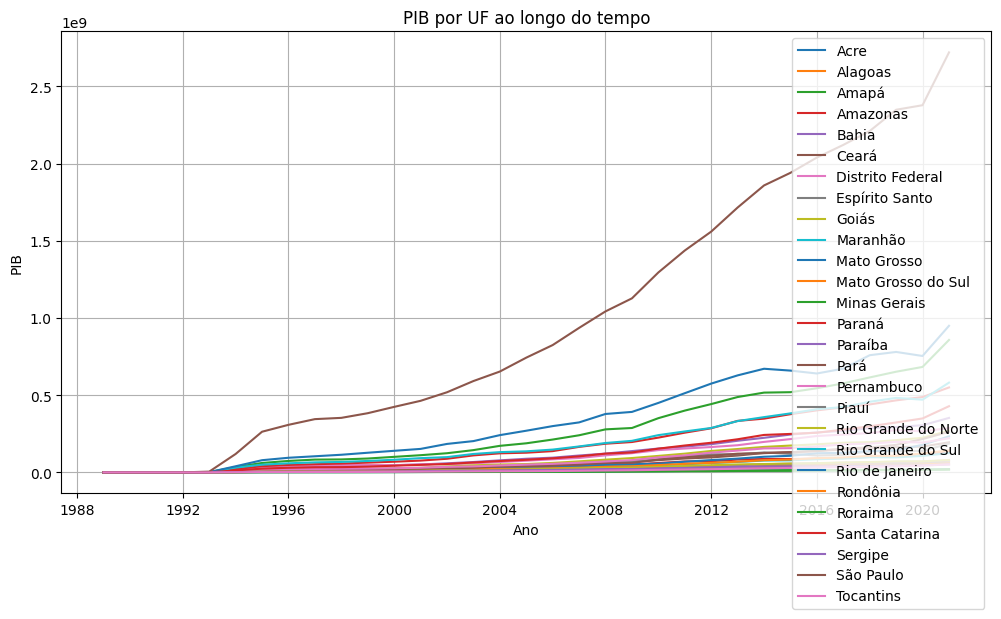

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando o gráfico de linhas para cada estado
for estado in gni_states_br.columns[1:]:
    plt.plot(gni_states_br['time'], gni_states_br[estado], label=estado)

# Configurando título e rótulos dos eixos
plt.title('PIB por UF ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB')

# Adicionando legenda
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()




In [57]:
#criando arquivo csv final
gni_states_br.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\gni_states_br.csv', encoding='UTF-8', index = False)

# Taxa de crescimento do PIB per capita por UF

### Fonte: IBGE (http://www.ipeadata.gov.br/Default.aspx)
### Obs.: a Taxa de crescimento do PIB per capita só tem desagregação Brasil (https://sidra.ibge.gov.br/Tabela/6601)

In [58]:
caminho = 'D:\\docs_mariana\\ProjetosGit\\Convergencia\\ipeadata_pib_pc[16-05-2024-06-17].csv'
#skiprows=1 para tirar o título da tabela
ipeadata_pib_pc = pd.read_csv(caminho, delimiter=';', skiprows=1)

In [59]:
ipeadata_pib_pc.head()

,Sigla,Código,Estado,1939,1947,1948,1949,1950,1951,1952,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 64
0,AC,12,Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,"21374440,009",NaN
1,AL,27,Alagoas,"1,5E-10","6,23E-10","6,97E-10","8,01E-10","8,69E-10","1,09E-09","1,19E-09",...,37282529,40974994,46367211,49468741,52851067,54413047,58963729,63202349,"76265620,286",NaN
2,AM,13,Amazonas,"1,84E-10","6,63E-10","6,31E-10","7,01E-10","7,33E-10","9,93E-10","1,14E-09",...,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,"131531037,762",NaN
3,AP,16,Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12763486,13400284,13861293,14342135,15481908,16795207,17496661,18469115,"20099850,517",NaN
4,BA,29,Bahia,"7,59E-10","2,82E-09","3,07E-09","3,33E-09","3,87E-09","4,56E-09","5,12E-09",...,204844274,223929966,245043690,258738970,268724090,286239541,293240504,305320813,"352617851,769",NaN


In [60]:
ipeadata_pib_pc.columns

Index(['Sigla', 'Código', 'Estado', '1939', '1947', '1948', '1949', '1950',
       '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1970', '1975',
       '1980', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'Unnamed: 64'],
      dtype='object')

In [61]:
ipeadata_pib_pc = ipeadata_pib_pc.drop(columns = ['Sigla', 'Código','Unnamed: 64'])

In [62]:
ipeadata_pib_pc.head()

,Estado,1939,1947,1948,1949,1950,1951,1952,1953,1954,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10137925,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,"21374440,009"
1,Alagoas,"1,5E-10","6,23E-10","6,97E-10","8,01E-10","8,69E-10","1,09E-09","1,19E-09","1,35E-09","1,76E-09",...,34650397,37282529,40974994,46367211,49468741,52851067,54413047,58963729,63202349,"76265620,286"
2,Amazonas,"1,84E-10","6,63E-10","6,31E-10","7,01E-10","7,33E-10","9,93E-10","1,14E-09","1,23E-09","1,64E-09",...,72242701,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,"131531037,762"
3,Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11130868,12763486,13400284,13861293,14342135,15481908,16795207,17496661,18469115,"20099850,517"
4,Bahia,"7,59E-10","2,82E-09","3,07E-09","3,33E-09","3,87E-09","4,56E-09","5,12E-09","6,39E-09","9,69E-09",...,182572530,204844274,223929966,245043690,258738970,268724090,286239541,293240504,305320813,"352617851,769"


In [63]:
gdp_pc_states_br = ipeadata_pib_pc.melt(id_vars='Estado', var_name='Ano', value_name='pib_pc')

In [64]:
gdp_pc_states_br.head()

,Estado,Ano,pib_pc
0,Acre,1939,NaN
1,Alagoas,1939,"1,5E-10"
2,Amazonas,1939,"1,84E-10"
3,Amapá,1939,NaN
4,Bahia,1939,"7,59E-10"


In [65]:
# Reorganizando o DataFrame para ter os estados como colunas e datas como índices
gdp_pc_states_br = gdp_pc_states_br.pivot(index='Ano', columns='Estado')['pib_pc']

# Removendo o nome da coluna de estados ('Estado')
gdp_pc_states_br.columns.name = None

In [66]:
gdp_pc_states_br.head(2)

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
1939,NaN,"1,5E-10",NaN,"1,84E-10","7,59E-10","3,53E-10",NaN,"2,01E-10","1,99E-10","2,07E-10",...,"1,44E-10","1,41E-10","1,72E-09","3,54E-09",NaN,NaN,"3,79E-10","1,04E-10","5,26E-09",NaN
1947,NaN,"6,23E-10",NaN,"6,63E-10","2,82E-09","1,2E-09",NaN,"7,53E-10","6,08E-10","5,15E-10",...,"4,48E-10","5,99E-10","6,44E-09","1,22E-08",NaN,NaN,"1,92E-09","3,71E-10","2,11E-08",NaN


In [67]:
gdp_pc_states_br.reset_index(inplace=True)

In [68]:
gdp_pc_states_br.head(2)

,Ano,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,1939,NaN,"1,5E-10",NaN,"1,84E-10","7,59E-10","3,53E-10",NaN,"2,01E-10","1,99E-10",...,"1,44E-10","1,41E-10","1,72E-09","3,54E-09",NaN,NaN,"3,79E-10","1,04E-10","5,26E-09",NaN
1,1947,NaN,"6,23E-10",NaN,"6,63E-10","2,82E-09","1,2E-09",NaN,"7,53E-10","6,08E-10",...,"4,48E-10","5,99E-10","6,44E-09","1,22E-08",NaN,NaN,"1,92E-09","3,71E-10","2,11E-08",NaN


In [69]:
gdp_pc_states_br.rename(columns={'Ano': 'time'}, inplace=True)

In [70]:
gdp_pc_states_br.head(2)

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,1939,NaN,"1,5E-10",NaN,"1,84E-10","7,59E-10","3,53E-10",NaN,"2,01E-10","1,99E-10",...,"1,44E-10","1,41E-10","1,72E-09","3,54E-09",NaN,NaN,"3,79E-10","1,04E-10","5,26E-09",NaN
1,1947,NaN,"6,23E-10",NaN,"6,63E-10","2,82E-09","1,2E-09",NaN,"7,53E-10","6,08E-10",...,"4,48E-10","5,99E-10","6,44E-09","1,22E-08",NaN,NaN,"1,92E-09","3,71E-10","2,11E-08",NaN


In [71]:
gdp_pc_states_br = gdp_pc_states_br.dropna()

In [72]:
gdp_pc_states_br.tail()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
56,2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
57,2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
58,2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
59,2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
60,2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [73]:
gdp_pc_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   time                 33 non-null     object
 1   Acre                 33 non-null     object
 2   Alagoas              33 non-null     object
 3   Amapá                33 non-null     object
 4   Amazonas             33 non-null     object
 5   Bahia                33 non-null     object
 6   Ceará                33 non-null     object
 7   Distrito Federal     33 non-null     object
 8   Espírito Santo       33 non-null     object
 9   Goiás                33 non-null     object
 10  Maranhão             33 non-null     object
 11  Mato Grosso          33 non-null     object
 12  Mato Grosso do Sul   33 non-null     object
 13  Minas Gerais         33 non-null     object
 14  Paraná               33 non-null     object
 15  Paraíba              33 non-null     object
 16  Pará          

In [74]:
gdp_pc_states_br['time'] = pd.to_datetime(gdp_pc_states_br['time'])

In [75]:
gdp_pc_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 33 non-null     datetime64[ns]
 1   Acre                 33 non-null     object        
 2   Alagoas              33 non-null     object        
 3   Amapá                33 non-null     object        
 4   Amazonas             33 non-null     object        
 5   Bahia                33 non-null     object        
 6   Ceará                33 non-null     object        
 7   Distrito Federal     33 non-null     object        
 8   Espírito Santo       33 non-null     object        
 9   Goiás                33 non-null     object        
 10  Maranhão             33 non-null     object        
 11  Mato Grosso          33 non-null     object        
 12  Mato Grosso do Sul   33 non-null     object        
 13  Minas Gerais         33 non-null     obje

In [76]:
# Converter colunas de estados de object para float, substituindo vírgulas por pontos
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return x
    return x

# Aplicar a função convert_to_float em todas as células do DataFrame
gdp_pc_states_br = gdp_pc_states_br.applymap(convert_to_float)

In [77]:
gdp_pc_states_br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 28 to 60
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 33 non-null     datetime64[ns]
 1   Acre                 33 non-null     float64       
 2   Alagoas              33 non-null     float64       
 3   Amapá                33 non-null     float64       
 4   Amazonas             33 non-null     float64       
 5   Bahia                33 non-null     float64       
 6   Ceará                33 non-null     float64       
 7   Distrito Federal     33 non-null     float64       
 8   Espírito Santo       33 non-null     float64       
 9   Goiás                33 non-null     float64       
 10  Maranhão             33 non-null     float64       
 11  Mato Grosso          33 non-null     float64       
 12  Mato Grosso do Sul   33 non-null     float64       
 13  Minas Gerais         33 non-null     floa

In [78]:
gdp_pc_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
28,1989-01-01,0.547705,2.458330,0.764695,7.521879,19.221150,6.554622,6.552042,7.234426,6.185994,...,1.591048,3.208654,3.482903e+01,4.390353e+01,2.266061,0.447835,17.837003,2.308752,1.607372e+02,0.622648
29,1990-01-01,15.996393,81.602266,18.591401,210.045517,518.982825,187.020021,186.050752,191.514121,202.410427,...,51.728208,82.949092,9.393634e+02,1.253944e+03,56.568589,12.950528,431.208116,66.398391,4.275247e+03,18.262168
30,1991-01-01,80.808201,428.900043,96.910902,1015.381910,2652.432271,1103.797982,1396.036917,998.626293,1135.898599,...,274.713844,473.239902,4.666959e+03,7.401139e+03,254.062018,56.547651,2105.983555,385.331595,2.125150e+04,109.515708
31,1992-01-01,928.068046,4630.854661,1125.864717,10138.268660,28114.111230,11750.976750,12978.012170,10802.932830,11199.894920,...,2644.460326,4599.257024,5.496496e+04,7.738496e+04,2550.129812,545.780932,24784.557500,4056.692304,2.274617e+05,1069.520619
32,1993-01-01,20105.632890,93464.359720,23048.075660,266842.245400,611119.117900,256992.461100,272431.285900,232453.819900,257273.955100,...,63230.969080,109454.582200,1.260808e+06,1.659392e+06,62153.628270,9591.466569,501168.587900,92531.715430,4.916925e+06,24925.049190


In [79]:
# Calculando a taxa de evolução para cada estado
for column in gdp_pc_states_br.columns[1:]:
    gdp_pc_states_br[column + '_taxa_evolucao'] = ((gdp_pc_states_br[column] - gdp_pc_states_br[column].shift(1)) / gdp_pc_states_br[column].shift(1)) * 100


In [80]:
gdp_pc_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí_taxa_evolucao,Rio Grande do Norte_taxa_evolucao,Rio Grande do Sul_taxa_evolucao,Rio de Janeiro_taxa_evolucao,Rondônia_taxa_evolucao,Roraima_taxa_evolucao,Santa Catarina_taxa_evolucao,Sergipe_taxa_evolucao,São Paulo_taxa_evolucao,Tocantins_taxa_evolucao
28,1989-01-01,0.547705,2.458330,0.764695,7.521879,19.221150,6.554622,6.552042,7.234426,6.185994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1990-01-01,15.996393,81.602266,18.591401,210.045517,518.982825,187.020021,186.050752,191.514121,202.410427,...,3151.203042,2485.167602,2597.069942,2756.135216,2396.340330,2791.806927,2317.492034,2775.943508,2559.774247,2832.986658
30,1991-01-01,80.808201,428.900043,96.910902,1015.381910,2652.432271,1103.797982,1396.036917,998.626293,1135.898599,...,431.071646,470.518485,396.821464,490.228765,349.122069,336.643607,388.391446,480.332732,397.082362,499.686228
31,1992-01-01,928.068046,4630.854661,1125.864717,10138.268660,28114.111230,11750.976750,12978.012170,10802.932830,11199.894920,...,862.623610,871.865856,1077.746802,945.581884,903.743035,865.169942,1076.863772,952.779570,970.332289,876.591065
32,1993-01-01,20105.632890,93464.359720,23048.075660,266842.245400,611119.117900,256992.461100,272431.285900,232453.819900,257273.955100,...,2291.072706,2279.831821,2193.839940,2044.333866,2337.273114,1657.383963,1922.100205,2180.964601,2061.649910,2230.487954


In [81]:
gdp_pc_states_br.columns

Index(['time', 'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins',
       'Acre_taxa_evolucao', 'Alagoas_taxa_evolucao', 'Amapá_taxa_evolucao',
       'Amazonas_taxa_evolucao', 'Bahia_taxa_evolucao', 'Ceará_taxa_evolucao',
       'Distrito Federal_taxa_evolucao', 'Espírito Santo_taxa_evolucao',
       'Goiás_taxa_evolucao', 'Maranhão_taxa_evolucao',
       'Mato Grosso_taxa_evolucao', 'Mato Grosso do Sul_taxa_evolucao',
       'Minas Gerais_taxa_evolucao', 'Paraná_taxa_evolucao',
       'Paraíba_taxa_evolucao', 'Pará_taxa_evolucao',
       'Pernambuco_taxa_evolucao', 'Piauí_taxa_evolucao',
       'Rio Grande do Norte_taxa_evolucao', 'Rio Grande do

In [82]:
rate_gdp_pc_states_br = gdp_pc_states_br.drop(columns = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'])

In [83]:
rate_gdp_pc_states_br.head()

,time,Acre_taxa_evolucao,Alagoas_taxa_evolucao,Amapá_taxa_evolucao,Amazonas_taxa_evolucao,Bahia_taxa_evolucao,Ceará_taxa_evolucao,Distrito Federal_taxa_evolucao,Espírito Santo_taxa_evolucao,Goiás_taxa_evolucao,...,Piauí_taxa_evolucao,Rio Grande do Norte_taxa_evolucao,Rio Grande do Sul_taxa_evolucao,Rio de Janeiro_taxa_evolucao,Rondônia_taxa_evolucao,Roraima_taxa_evolucao,Santa Catarina_taxa_evolucao,Sergipe_taxa_evolucao,São Paulo_taxa_evolucao,Tocantins_taxa_evolucao
28,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1990-01-01,2820.623565,3219.418349,2331.217247,2692.460871,2600.061275,2753.254242,2739.584429,2547.260673,3172.076021,...,3151.203042,2485.167602,2597.069942,2756.135216,2396.340330,2791.806927,2317.492034,2775.943508,2559.774247,2832.986658
30,1991-01-01,405.165138,425.598201,421.267336,383.410417,411.082861,490.203110,650.352739,421.437422,461.185811,...,431.071646,470.518485,396.821464,490.228765,349.122069,336.643607,388.391446,480.332732,397.082362,499.686228
31,1992-01-01,1048.482495,979.704872,1061.752386,898.468513,959.937007,964.594875,829.632448,981.779330,885.994254,...,862.623610,871.865856,1077.746802,945.581884,903.743035,865.169942,1076.863772,952.779570,970.332289,876.591065
32,1993-01-01,2066.396417,1918.296115,1947.144325,2532.029732,2073.709540,2086.988083,1999.175762,2051.765854,2197.110437,...,2291.072706,2279.831821,2193.839940,2044.333866,2337.273114,1657.383963,1922.100205,2180.964601,2061.649910,2230.487954


In [84]:
rate_gdp_pc_states_br.rename(columns={'Acre_taxa_evolucao': 'Acre', 'Alagoas_taxa_evolucao': 'Alagoas', 'Amapá_taxa_evolucao': 'Amapá',
       'Amazonas_taxa_evolucao': 'Amazonas', 'Bahia_taxa_evolucao': 'Bahia', 'Ceará_taxa_evolucao': 'Ceará',
       'Distrito Federal_taxa_evolucao': 'Distrito Federal', 'Espírito Santo_taxa_evolucao': 'Espírito Santo',
       'Goiás_taxa_evolucao': 'Goiás', 'Maranhão_taxa_evolucao': 'Maranhão',
       'Mato Grosso_taxa_evolucao': 'Mato Grosso', 'Mato Grosso do Sul_taxa_evolucao': 'Mato Grosso do Sul',
       'Minas Gerais_taxa_evolucao': 'Minas Gerais', 'Paraná_taxa_evolucao': 'Paraná',
       'Paraíba_taxa_evolucao': 'Paraíba', 'Pará_taxa_evolucao': 'Pará',
       'Pernambuco_taxa_evolucao': 'Pernambuco', 'Piauí_taxa_evolucao': 'Piauí',
       'Rio Grande do Norte_taxa_evolucao': 'Rio Grande do Norte', 'Rio Grande do Sul_taxa_evolucao': 'Rio Grande do Sul',
       'Rio de Janeiro_taxa_evolucao': 'Rio de Janeiro', 'Rondônia_taxa_evolucao': 'Rondônia',
       'Roraima_taxa_evolucao': 'Roraima', 'Santa Catarina_taxa_evolucao': 'Santa Catarina',
       'Sergipe_taxa_evolucao': 'Sergipe', 'São Paulo_taxa_evolucao': 'São Paulo',
       'Tocantins_taxa_evolucao': 'Tocantins'}, inplace=True)

In [85]:
rate_gdp_pc_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
28,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1990-01-01,2820.623565,3219.418349,2331.217247,2692.460871,2600.061275,2753.254242,2739.584429,2547.260673,3172.076021,...,3151.203042,2485.167602,2597.069942,2756.135216,2396.340330,2791.806927,2317.492034,2775.943508,2559.774247,2832.986658
30,1991-01-01,405.165138,425.598201,421.267336,383.410417,411.082861,490.203110,650.352739,421.437422,461.185811,...,431.071646,470.518485,396.821464,490.228765,349.122069,336.643607,388.391446,480.332732,397.082362,499.686228
31,1992-01-01,1048.482495,979.704872,1061.752386,898.468513,959.937007,964.594875,829.632448,981.779330,885.994254,...,862.623610,871.865856,1077.746802,945.581884,903.743035,865.169942,1076.863772,952.779570,970.332289,876.591065
32,1993-01-01,2066.396417,1918.296115,1947.144325,2532.029732,2073.709540,2086.988083,1999.175762,2051.765854,2197.110437,...,2291.072706,2279.831821,2193.839940,2044.333866,2337.273114,1657.383963,1922.100205,2180.964601,2061.649910,2230.487954


In [86]:
rate_gdp_pc_states_br = rate_gdp_pc_states_br.dropna()

In [87]:
rate_gdp_pc_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
29,1990-01-01,2820.623565,3219.418349,2331.217247,2692.460871,2600.061275,2753.254242,2739.584429,2547.260673,3172.076021,...,3151.203042,2485.167602,2597.069942,2756.135216,2396.340330,2791.806927,2317.492034,2775.943508,2559.774247,2832.986658
30,1991-01-01,405.165138,425.598201,421.267336,383.410417,411.082861,490.203110,650.352739,421.437422,461.185811,...,431.071646,470.518485,396.821464,490.228765,349.122069,336.643607,388.391446,480.332732,397.082362,499.686228
31,1992-01-01,1048.482495,979.704872,1061.752386,898.468513,959.937007,964.594875,829.632448,981.779330,885.994254,...,862.623610,871.865856,1077.746802,945.581884,903.743035,865.169942,1076.863772,952.779570,970.332289,876.591065
32,1993-01-01,2066.396417,1918.296115,1947.144325,2532.029732,2073.709540,2086.988083,1999.175762,2051.765854,2197.110437,...,2291.072706,2279.831821,2193.839940,2044.333866,2337.273114,1657.383963,1922.100205,2180.964601,2061.649910,2230.487954
33,1994-01-01,2627.376623,2453.165675,2609.910560,2102.969124,2350.006228,2461.931607,2387.970049,2640.068960,2547.077700,...,2453.468039,2287.570557,2368.989078,2287.086703,2351.633003,2386.156338,2450.069491,2106.852970,2325.351801,2559.603166


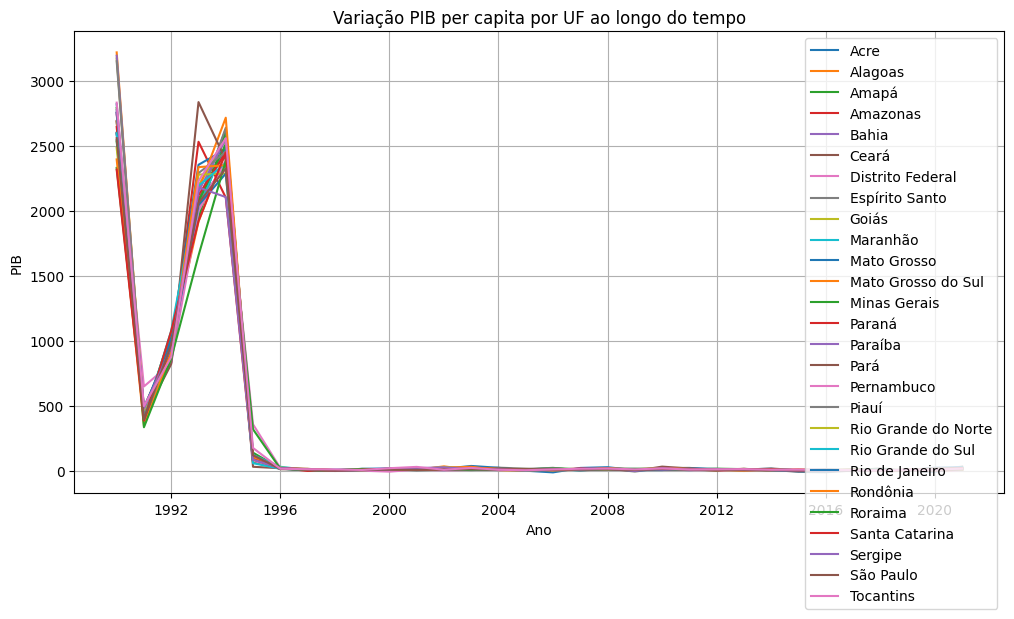

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando o gráfico de linhas para cada estado
for estado in rate_gdp_pc_states_br.columns[1:]:
    plt.plot(rate_gdp_pc_states_br['time'], rate_gdp_pc_states_br[estado], label=estado)

# Configurando título e rótulos dos eixos
plt.title('Variação PIB per capita por UF ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB')

# Adicionando legenda
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

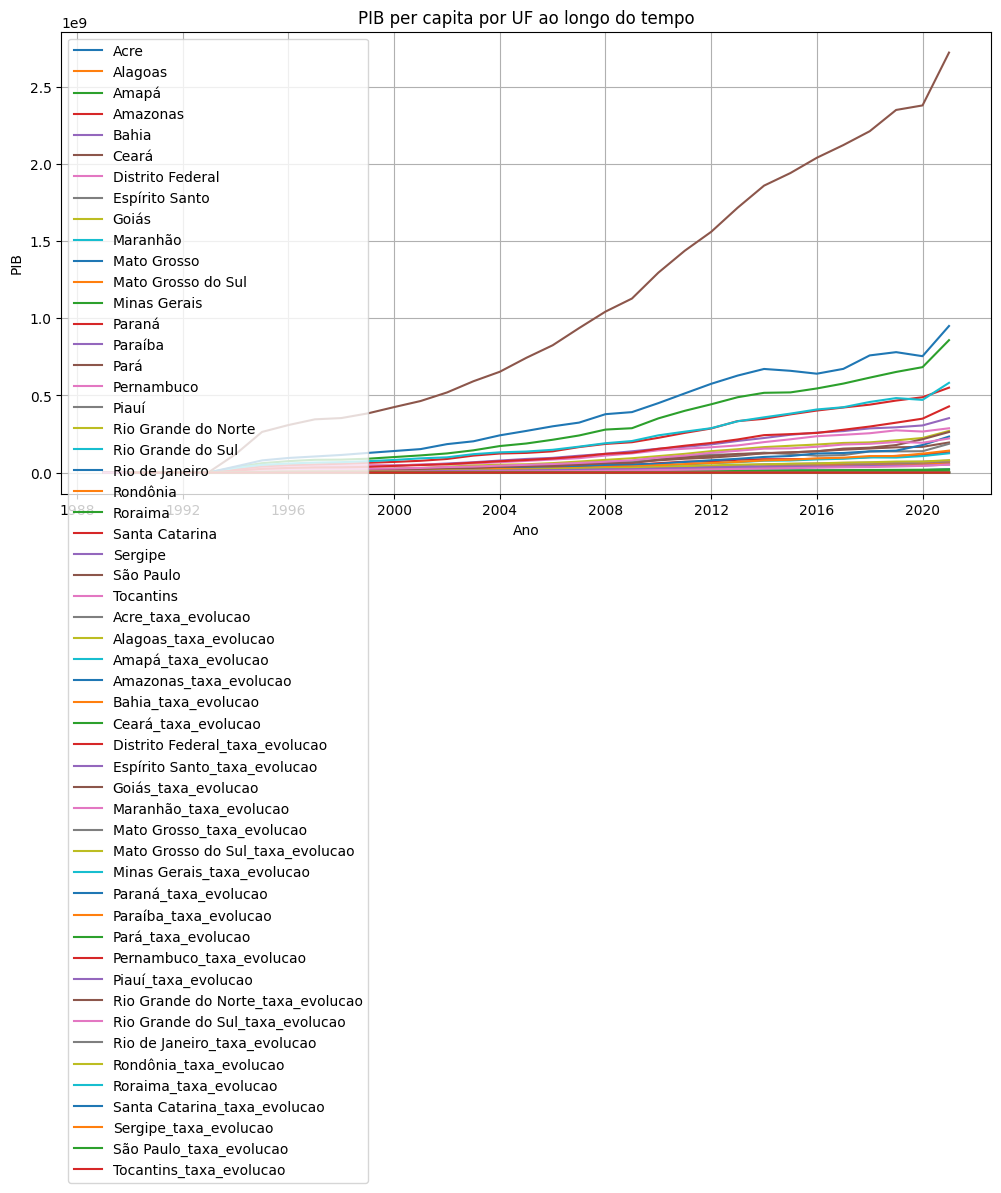

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando o gráfico de linhas para cada estado
for estado in gdp_pc_states_br.columns[1:]:
    plt.plot(gdp_pc_states_br['time'], gdp_pc_states_br[estado], label=estado)

# Configurando título e rótulos dos eixos
plt.title('PIB per capita por UF ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB')

# Adicionando legenda
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [90]:
# Substitua o caminho abaixo pelo caminho correto onde você deseja salvar o arquivo
caminho_arquivo = 'D:/docs_mariana/ProjetosGit/Convergencia/data_eurofound_est/rate_gdp_pc_states_br.csv'

# Salvar o DataFrame como um arquivo CSV
rate_gdp_pc_states_br.to_csv(caminho_arquivo, encoding='UTF-8', index = False)

In [91]:
# Substitua o caminho abaixo pelo caminho correto onde você deseja salvar o arquivo
caminho_arquivo = 'D:/docs_mariana/ProjetosGit/Convergencia/data_eurofound_est/gdp_pc_states_br.csv'

# Salvar o DataFrame como um arquivo CSV
gdp_pc_states_br.to_csv(caminho_arquivo, encoding='UTF-8', index = False)